<a href="https://colab.research.google.com/github/SeyoungYoo/DLforEveryone/blob/main/Season01/ML_Lab03_Minimizing_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 31.4MB/s 
     |████████████████████████████████| 512kB 21.9MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=05e206fe281f2a2b135004010c78782179b72422b53f3d2ee4a5ae4878ad959d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

##**cost를 최소화하기**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
X = [1,2,3]
Y = [1,2,3]

In [4]:
W = tf.placeholder(tf.float32)

In [5]:
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [6]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [7]:
# Variables for plotting cost function
# 그래프를 실행시키면서 발생할 W, cost를 저장할 리스트
W_val = []
cost_val = []

In [8]:
# -30~50 실행시키기
for i in range(-30, 50):
  feed_W = i * 0.1    # W는 -3~5 사이를 움직임.
  curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})    # feed_dict로 W를 바꿔가면서 실행
  # 실행하면서 발생한 W와 cost를 리스트에 저장하기
  W_val.append(curr_W)
  cost_val.append(curr_cost)

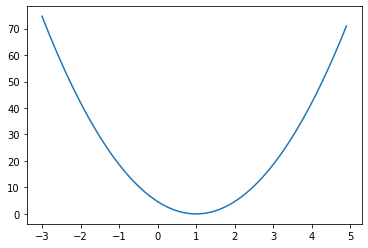

In [9]:
# Show the cost fuction
# 그래프 그리기
plt.plot(W_val, cost_val)   # x축: W_val, y축: cost_val
plt.show()

* W가 1일 때 cost가 가장 최소화된다.

##**Gradient descent**

* cost의 최소화: 미분을 이용하여 Gradient Descent 
* W -= learning_rate * derivative

  ```
  learning_rate = 0.1
  gradient = tf.reduce_mean((W * X - Y) * X)
  descent = W - learning_rate * gradient
  update = W.assign(descent) 
  ```

  * graph에서 update를 실행시키면 위의 알고리즘이 돌아간다.

###**cost 최소화하기2**

* Gradient Descent 이용

In [10]:
import tensorflow as tf

In [11]:
x_data = [1,2,3]
y_data = [1,2,3]

In [12]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [13]:
# Our hypothesis for linear model X * W
hypothesis = X * W

In [14]:
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [16]:
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [17]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [18]:
for step in range(21):
  sess.run(update, feed_dict = {X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run(W))

0 0.95181566 [0.54838014]
1 0.27073872 [0.7591361]
2 0.07701009 [0.87153924]
3 0.021905119 [0.93148756]
4 0.0062307864 [0.96346]
5 0.0017723171 [0.980512]
6 0.0005041205 [0.98960644]
7 0.00014339463 [0.99445677]
8 4.0787807e-05 [0.9970436]
9 1.1601761e-05 [0.9984233]
10 3.299878e-06 [0.9991591]
11 9.385654e-07 [0.99955153]
12 2.6702486e-07 [0.9997608]
13 7.59267e-08 [0.99987245]
14 2.1592422e-08 [0.999932]
15 6.1287815e-09 [0.99996376]
16 1.7404318e-09 [0.9999807]
17 4.974332e-10 [0.9999897]
18 1.4032746e-10 [0.9999945]
19 4.0156323e-11 [0.9999971]
20 1.1581847e-11 [0.99999845]


**Gradient Descent Magic**
* cost를 일일이 미분하지 않아도 자동으로 처리해주는 방법

  ```
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
  train = optimizer.minimize(cost)
  ```

###**W=5일때**

* W를 터무니없는 값을 주고 시작했을 때 잘 작동하는지를 알아보기 위함

In [19]:
import tensorflow as tf

In [20]:
# tf Graph Input
X = [1,2,3]
Y = [1,2,3]

In [22]:
# Set wrong model weights
W = tf.Variable(5.0)

In [23]:
# Linear model
hypothesis = X * W
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [24]:
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

In [25]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the grpah.
sess.run(tf.global_variables_initializer())

In [26]:
for step in range(10):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


* optimizer가 제대로 동작하는 것을 확인할 수 있다.
  * W가 1.0으로 수렴하는 것을 통해 알 수 있음.

##**Optional: compute_gradient and apply_gradient**

In [27]:
import tensorflow as tf

In [28]:
X = [1,2,3]
Y = [1,2,3]

In [34]:
# Set wrong model weights
W = tf.Variable(5.)

In [40]:
# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2   # 손으로 계산한 gradient

# cost/Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

In [41]:
# Get gradients
gvs = optimizer.compute_gradients(cost, [W])

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

In [42]:
# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [43]:
for step in range(100):
  print(step, sess.run([gradient, W, gvs]))
  sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [

* 손으로 계산한 gradient(gradient)와 컴퓨터가 자동으로 계산한 gradient(gvs)는 유사하다.